###가설: 딥러닝 기법으로 고객이 주로 구매하는 상품의 대분류를 예측 할 수 있다.
#### 고객 수요 예측 및 타겟팅 광고의 이점
- 전체 고객을 대상으로 스팸문자를 보내는 것 보다 광고 비용을 절약 할 수 있다.
- 스팸문자 최소화로 고객들의 피로도를 감소시키고 광고 문자 및 알림 서비스에 대한 고객들의 차단행위를 예방 할 수 있다.
- 고객 정보를 토대로한 상품수요에 대한 예측률이 높아질수록 상품에 대한 수요를 선제적으로 예측 할 수 있어, 재고관리에 용이하고 재고비용을 줄일 수 있다.

과제 수행을 위한 딥러닝 다중분류 작업을 위해 구글 Colab Pro 구매 

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jan  9 07:03:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


오라클 SQL을 통해 작성한 데이터 마트(과제 2번) 읽어오기 및 결측치 제거

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/DNI_최영두_과제2.xlsx')
df.head()

,BASE_YYMM,CUST_NO,ENTL_DIVS,CUST_CLSS,BRTH_DAY,CUST_AGE,CUST_AGLV_ID,BUY_CNT,BUY_YN,DCNT_PROD_BUY_CNT,BUY_AMT,MAIN_BUY_DTTM,MAIN_BUY_LCLS_NM,MAIN_BUY_PROD_NO,MAIN_BUY_PROD_NM,MAX_BUY_AMT_LCLS_NM,MAX_BUY_AMT_PROD_NO,MAX_BUY_AMT_PROD_NM
0,202006,450065,B점포,1형고객,1978-0128,42.0,4.0,7,1,6,61000,20200623,건어물,20110,국물멸치(1kg*기획)/국산,건어물,20110,국물멸치(1kg*기획)/국산
1,202006,261196,H점포,1형고객,1969-0526,51.0,5.0,4,1,4,34950,20200604,돼지고기,33928,돼지등뼈(냉장/1.5kg/,돼지고기,33928,돼지등뼈(냉장/1.5kg/
2,202006,377380,C점포,1형고객,1957-0821,63.0,6.0,22,1,22,144640,20200625,간식거리,15406,고구마양갱(),조미,20708,발아참기름(300ml
3,202006,309279,A점포,단체고객,1913-2828,107.0,9.0,98,1,98,1166760,20200625,채소,5935,(영)깐마늘(150g/,육가공품,36393,통등심돈가
4,202006,482647,F점포,1형고객,1946-0326,74.0,7.0,11,1,11,6900,20200628,채소,22965,무(1kg/무농약이상),채소,22965,무(1kg/무농약이상)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9106 entries, 0 to 9105
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BASE_YYMM            9106 non-null   int64  
 1   CUST_NO              9106 non-null   int64  
 2   ENTL_DIVS            9106 non-null   object 
 3   CUST_CLSS            9106 non-null   object 
 4   BRTH_DAY             8897 non-null   object 
 5   CUST_AGE             8897 non-null   float64
 6   CUST_AGLV_ID         8897 non-null   float64
 7   BUY_CNT              9106 non-null   int64  
 8   BUY_YN               9106 non-null   int64  
 9   DCNT_PROD_BUY_CNT    9106 non-null   int64  
 10  BUY_AMT              9106 non-null   int64  
 11  MAIN_BUY_DTTM        9106 non-null   int64  
 12  MAIN_BUY_LCLS_NM     9106 non-null   object 
 13  MAIN_BUY_PROD_NO     9106 non-null   int64  
 14  MAIN_BUY_PROD_NM     9076 non-null   object 
 15  MAX_BUY_AMT_LCLS_NM  9106 non-null   o

In [6]:
df_drop_null = df.dropna(axis=0)
df_drop_null.head()

,BASE_YYMM,CUST_NO,ENTL_DIVS,CUST_CLSS,BRTH_DAY,CUST_AGE,CUST_AGLV_ID,BUY_CNT,BUY_YN,DCNT_PROD_BUY_CNT,BUY_AMT,MAIN_BUY_DTTM,MAIN_BUY_LCLS_NM,MAIN_BUY_PROD_NO,MAIN_BUY_PROD_NM,MAX_BUY_AMT_LCLS_NM,MAX_BUY_AMT_PROD_NO,MAX_BUY_AMT_PROD_NM
0,202006,450065,B점포,1형고객,1978-0128,42.0,4.0,7,1,6,61000,20200623,건어물,20110,국물멸치(1kg*기획)/국산,건어물,20110,국물멸치(1kg*기획)/국산
1,202006,261196,H점포,1형고객,1969-0526,51.0,5.0,4,1,4,34950,20200604,돼지고기,33928,돼지등뼈(냉장/1.5kg/,돼지고기,33928,돼지등뼈(냉장/1.5kg/
2,202006,377380,C점포,1형고객,1957-0821,63.0,6.0,22,1,22,144640,20200625,간식거리,15406,고구마양갱(),조미,20708,발아참기름(300ml
3,202006,309279,A점포,단체고객,1913-2828,107.0,9.0,98,1,98,1166760,20200625,채소,5935,(영)깐마늘(150g/,육가공품,36393,통등심돈가
4,202006,482647,F점포,1형고객,1946-0326,74.0,7.0,11,1,11,6900,20200628,채소,22965,무(1kg/무농약이상),채소,22965,무(1kg/무농약이상)


In [7]:
#결측치 제거후 인덱스 재설정
df_drop_null01 = df_drop_null.reset_index(drop=True)

In [8]:
df_drop_null01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BASE_YYMM            8852 non-null   int64  
 1   CUST_NO              8852 non-null   int64  
 2   ENTL_DIVS            8852 non-null   object 
 3   CUST_CLSS            8852 non-null   object 
 4   BRTH_DAY             8852 non-null   object 
 5   CUST_AGE             8852 non-null   float64
 6   CUST_AGLV_ID         8852 non-null   float64
 7   BUY_CNT              8852 non-null   int64  
 8   BUY_YN               8852 non-null   int64  
 9   DCNT_PROD_BUY_CNT    8852 non-null   int64  
 10  BUY_AMT              8852 non-null   int64  
 11  MAIN_BUY_DTTM        8852 non-null   int64  
 12  MAIN_BUY_LCLS_NM     8852 non-null   object 
 13  MAIN_BUY_PROD_NO     8852 non-null   int64  
 14  MAIN_BUY_PROD_NM     8852 non-null   object 
 15  MAX_BUY_AMT_LCLS_NM  8852 non-null   o

변수 축소(축소를 하지 않을 시 구글드라이브 용량 초과 문제 발생)

In [9]:
import math

In [10]:
df_buy_cnt = pd.DataFrame(columns=['buy_cnt'])
buy_cnt = []
for i in range(0,len(df_drop_null01['BUY_CNT'])):
  buy_cnt = math.trunc(df_drop_null01['BUY_CNT'][i]/10)
  df_buy_cnt = df_buy_cnt.append(pd.DataFrame([[buy_cnt]],columns=['buy_cnt']),ignore_index=False)
df_buy_cnt01 = df_buy_cnt.reset_index(drop=True)
df_buy_cnt01.head()

,buy_cnt
0,0
1,0
2,2
3,9
4,1


In [11]:
df_dcnt_prod_buy_cnt = pd.DataFrame(columns=['dcnt_prod_buy_cnt'])
dcnt_prod_buy_cnt = []
for i in range(0,len(df_drop_null01['DCNT_PROD_BUY_CNT'])):
  dcnt_prod_buy_cnt = math.trunc(df_drop_null01['DCNT_PROD_BUY_CNT'][i]/10)
  df_dcnt_prod_buy_cnt = df_dcnt_prod_buy_cnt.append(pd.DataFrame([[dcnt_prod_buy_cnt]],columns=['dcnt_prod_buy_cnt']),ignore_index=False)
df_dcnt_prod_buy_cnt01 = df_dcnt_prod_buy_cnt.reset_index(drop=True)
df_dcnt_prod_buy_cnt01.head()

,dcnt_prod_buy_cnt
0,0
1,0
2,2
3,9
4,1


In [12]:
df_buy_amt = pd.DataFrame(columns=['buy_amt'])
buy_amt = []
for i in range(0,len(df_drop_null01['BUY_AMT'])):
  buy_amt = math.trunc(df_drop_null01['BUY_AMT'][i]/100000)
  df_buy_amt = df_buy_amt.append(pd.DataFrame([[buy_amt]],columns=['buy_amt']),ignore_index=False)
df_buy_amt01 = df_buy_amt.reset_index(drop=True)
df_buy_amt01.head()

,buy_amt
0,0
1,0
2,1
3,11
4,0


사용할 범주형 변수들 원_핫 인코딩

In [49]:
df_1 = pd.get_dummies(df_drop_null['ENTL_DIVS'], prefix = 'ENTL_DIVS')
df_101 = df_1.reset_index(drop=True)
df_101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ENTL_DIVS_A점포    8852 non-null   uint8
 1   ENTL_DIVS_B점포    8852 non-null   uint8
 2   ENTL_DIVS_C점포    8852 non-null   uint8
 3   ENTL_DIVS_D점포    8852 non-null   uint8
 4   ENTL_DIVS_E점포    8852 non-null   uint8
 5   ENTL_DIVS_F점포    8852 non-null   uint8
 6   ENTL_DIVS_H점포    8852 non-null   uint8
 7   ENTL_DIVS_무점포    8852 non-null   uint8
dtypes: uint8(8)
memory usage: 69.3 KB


In [50]:
df_2 = pd.get_dummies(df_drop_null['CUST_CLSS'], prefix = 'CUST_CLSS')
df_201 = df_2.reset_index(drop=True)
df_201.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   CUST_CLSS_1형고객       8852 non-null   uint8
 1   CUST_CLSS_2형고객       8852 non-null   uint8
 2   CUST_CLSS_3형고객       8852 non-null   uint8
 3   CUST_CLSS_단체고객       8852 non-null   uint8
dtypes: uint8(4)
memory usage: 34.7 KB


In [51]:
df_3 = pd.get_dummies(df_drop_null['CUST_AGLV_ID'], prefix = 'CUST_AGLV_ID')
df_301 = df_3.reset_index(drop=True)
df_301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CUST_AGLV_ID_2.0  8852 non-null   uint8
 1   CUST_AGLV_ID_3.0  8852 non-null   uint8
 2   CUST_AGLV_ID_4.0  8852 non-null   uint8
 3   CUST_AGLV_ID_5.0  8852 non-null   uint8
 4   CUST_AGLV_ID_6.0  8852 non-null   uint8
 5   CUST_AGLV_ID_7.0  8852 non-null   uint8
 6   CUST_AGLV_ID_8.0  8852 non-null   uint8
 7   CUST_AGLV_ID_9.0  8852 non-null   uint8
dtypes: uint8(8)
memory usage: 69.3 KB


In [16]:
df_4 = pd.get_dummies(df_buy_cnt01['buy_cnt'], prefix = 'BUY_CNT')
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   BUY_CNT_0    8852 non-null   uint8
 1   BUY_CNT_1    8852 non-null   uint8
 2   BUY_CNT_2    8852 non-null   uint8
 3   BUY_CNT_3    8852 non-null   uint8
 4   BUY_CNT_4    8852 non-null   uint8
 5   BUY_CNT_5    8852 non-null   uint8
 6   BUY_CNT_6    8852 non-null   uint8
 7   BUY_CNT_7    8852 non-null   uint8
 8   BUY_CNT_8    8852 non-null   uint8
 9   BUY_CNT_9    8852 non-null   uint8
 10  BUY_CNT_10   8852 non-null   uint8
 11  BUY_CNT_11   8852 non-null   uint8
 12  BUY_CNT_12   8852 non-null   uint8
 13  BUY_CNT_13   8852 non-null   uint8
 14  BUY_CNT_14   8852 non-null   uint8
 15  BUY_CNT_15   8852 non-null   uint8
 16  BUY_CNT_16   8852 non-null   uint8
 17  BUY_CNT_17   8852 non-null   uint8
 18  BUY_CNT_18   8852 non-null   uint8
 19  BUY_CNT_19   8852 non-null   uint8
 20  BUY_CNT_

In [17]:
df_5 = pd.get_dummies(df_dcnt_prod_buy_cnt01['dcnt_prod_buy_cnt'], prefix = 'DCNT_PROD_BUY_CNT')
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   DCNT_PROD_BUY_CNT_0    8852 non-null   uint8
 1   DCNT_PROD_BUY_CNT_1    8852 non-null   uint8
 2   DCNT_PROD_BUY_CNT_2    8852 non-null   uint8
 3   DCNT_PROD_BUY_CNT_3    8852 non-null   uint8
 4   DCNT_PROD_BUY_CNT_4    8852 non-null   uint8
 5   DCNT_PROD_BUY_CNT_5    8852 non-null   uint8
 6   DCNT_PROD_BUY_CNT_6    8852 non-null   uint8
 7   DCNT_PROD_BUY_CNT_7    8852 non-null   uint8
 8   DCNT_PROD_BUY_CNT_8    8852 non-null   uint8
 9   DCNT_PROD_BUY_CNT_9    8852 non-null   uint8
 10  DCNT_PROD_BUY_CNT_10   8852 non-null   uint8
 11  DCNT_PROD_BUY_CNT_11   8852 non-null   uint8
 12  DCNT_PROD_BUY_CNT_12   8852 non-null   uint8
 13  DCNT_PROD_BUY_CNT_13   8852 non-null   uint8
 14  DCNT_PROD_BUY_CNT_14   8852 non-null   uint8
 15  DCNT_PROD_BUY_CNT_15   8852 non-null  

In [18]:
df_6 = pd.get_dummies(df_buy_amt01['buy_amt'], prefix = 'BUY_AMT')
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BUY_AMT_-1    8852 non-null   uint8
 1   BUY_AMT_0     8852 non-null   uint8
 2   BUY_AMT_1     8852 non-null   uint8
 3   BUY_AMT_2     8852 non-null   uint8
 4   BUY_AMT_3     8852 non-null   uint8
 5   BUY_AMT_4     8852 non-null   uint8
 6   BUY_AMT_5     8852 non-null   uint8
 7   BUY_AMT_6     8852 non-null   uint8
 8   BUY_AMT_7     8852 non-null   uint8
 9   BUY_AMT_8     8852 non-null   uint8
 10  BUY_AMT_9     8852 non-null   uint8
 11  BUY_AMT_10    8852 non-null   uint8
 12  BUY_AMT_11    8852 non-null   uint8
 13  BUY_AMT_12    8852 non-null   uint8
 14  BUY_AMT_13    8852 non-null   uint8
 15  BUY_AMT_14    8852 non-null   uint8
 16  BUY_AMT_16    8852 non-null   uint8
 17  BUY_AMT_17    8852 non-null   uint8
 18  BUY_AMT_18    8852 non-null   uint8
 19  BUY_AMT_19    8852 non-null

라벨값 데이터(대분류 이름) 확인 및 숫자형데이터로 변환

In [19]:
LCLS_NM_lst = pd.unique(df_drop_null['MAIN_BUY_LCLS_NM'])
print(LCLS_NM_lst)

['건어물' '돼지고기' '간식거리' '채소' '유제품' '조리용반찬' '조미' '유정란/알' '임산부꾸러미' '화장품' '과일'
 '소고기' '육가공품' '주잡곡' '식사대용식' '세제류' '기타' '가정식반찬' '냉동수산' '꿀' '환경생활용품' '민중교역'
 '마실거리' '위생용품' '건강식품' '가입비' '김장' '냉장수산' '닭/오리' '주류' '어린이집' '선물세트 기획']


In [20]:
df_lcls_num = pd.DataFrame(columns=['MAIN_BUY_LCLS_NUM'])
for i in range(0,len(df_drop_null01['MAIN_BUY_LCLS_NM'])):
  for j in range(0,len(LCLS_NM_lst)):
    if df_drop_null01['MAIN_BUY_LCLS_NM'][i] == LCLS_NM_lst[j]:
      df_lcls_num = df_lcls_num.append(pd.DataFrame([[j]],columns=['MAIN_BUY_LCLS_NUM']),ignore_index=True)
df_lcls_num.head()

,MAIN_BUY_LCLS_NUM
0,0
1,1
2,2
3,3
4,3


In [21]:
df_lcls_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MAIN_BUY_LCLS_NUM  8852 non-null   object
dtypes: object(1)
memory usage: 69.3+ KB


In [22]:
df_lcls_num01 = df_lcls_num.apply(pd.to_numeric, errors='coerce')

In [23]:
df_lcls_num01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8852 entries, 0 to 8851
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   MAIN_BUY_LCLS_NUM  8852 non-null   int64
dtypes: int64(1)
memory usage: 69.3 KB


In [24]:
pd.unique(df_lcls_num['MAIN_BUY_LCLS_NUM'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=object)

라벨값 데이터 불균형 확인

In [25]:
df_lcls_num['MAIN_BUY_LCLS_NUM'].value_counts(ascending=True)

31       3
29       8
26       9
30      14
19      27
25      29
27      40
8       53
15      58
23      88
16      93
28      99
20     103
0      109
9      115
18     151
21     161
11     166
24     175
22     214
12     257
14     355
1      376
17     395
7      396
4      518
6      529
5      551
2      571
10     665
13     702
3     1822
Name: MAIN_BUY_LCLS_NUM, dtype: int64

In [26]:
import matplotlib.pylab as plt

데이터중 '채소'가 가장 많이 포함, 선물세트가 가장 적은 비율차지

In [27]:
dict_lcls_num = {}
for i in range(0,32):
  dict_lcls_num[i] = df_lcls_num['MAIN_BUY_LCLS_NUM'].value_counts()[i]
print(dict_lcls_num)

{0: 109, 1: 376, 2: 571, 3: 1822, 4: 518, 5: 551, 6: 529, 7: 396, 8: 53, 9: 115, 10: 665, 11: 166, 12: 257, 13: 702, 14: 355, 15: 58, 16: 93, 17: 395, 18: 151, 19: 27, 20: 103, 21: 161, 22: 214, 23: 88, 24: 175, 25: 29, 26: 9, 27: 40, 28: 99, 29: 8, 30: 14, 31: 3}


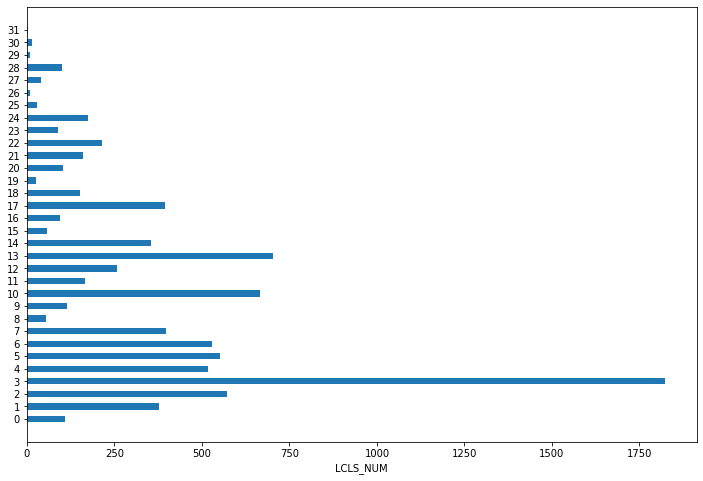

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ypos = np.arange(32)
rects = plt.barh(ypos, dict_lcls_num.values(), align='center', height=0.5)
plt.yticks(ypos, dict_lcls_num.keys())
plt.xlabel('LCLS_NUM')
plt.show()

원_핫 인코딩한 범주형 변수 데이터프레임 통합

In [52]:
df = pd.concat([df_101, df_201, df_301, df_4, df_5, df_6, df_lcls_num01], axis=1)
df

,ENTL_DIVS_A점포,ENTL_DIVS_B점포,ENTL_DIVS_C점포,ENTL_DIVS_D점포,ENTL_DIVS_E점포,ENTL_DIVS_F점포,ENTL_DIVS_H점포,ENTL_DIVS_무점포,CUST_CLSS_1형고객,CUST_CLSS_2형고객,CUST_CLSS_3형고객,CUST_CLSS_단체고객,CUST_AGLV_ID_2.0,CUST_AGLV_ID_3.0,CUST_AGLV_ID_4.0,CUST_AGLV_ID_5.0,CUST_AGLV_ID_6.0,CUST_AGLV_ID_7.0,CUST_AGLV_ID_8.0,CUST_AGLV_ID_9.0,BUY_CNT_0,BUY_CNT_1,BUY_CNT_2,BUY_CNT_3,BUY_CNT_4,BUY_CNT_5,BUY_CNT_6,BUY_CNT_7,BUY_CNT_8,BUY_CNT_9,BUY_CNT_10,BUY_CNT_11,BUY_CNT_12,BUY_CNT_13,BUY_CNT_14,BUY_CNT_15,BUY_CNT_16,BUY_CNT_17,BUY_CNT_18,BUY_CNT_19,...,BUY_AMT_0,BUY_AMT_1,BUY_AMT_2,BUY_AMT_3,BUY_AMT_4,BUY_AMT_5,BUY_AMT_6,BUY_AMT_7,BUY_AMT_8,BUY_AMT_9,BUY_AMT_10,BUY_AMT_11,BUY_AMT_12,BUY_AMT_13,BUY_AMT_14,BUY_AMT_16,BUY_AMT_17,BUY_AMT_18,BUY_AMT_19,BUY_AMT_21,BUY_AMT_22,BUY_AMT_23,BUY_AMT_26,BUY_AMT_28,BUY_AMT_29,BUY_AMT_30,BUY_AMT_31,BUY_AMT_32,BUY_AMT_34,BUY_AMT_35,BUY_AMT_39,BUY_AMT_42,BUY_AMT_44,BUY_AMT_45,BUY_AMT_95,BUY_AMT_99,BUY_AMT_100,BUY_AMT_732,BUY_AMT_3196,MAIN_BUY_LCLS_NUM
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8848,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8849,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
8850,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13


결측치 제거

In [57]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [58]:
X.shape

(8852, 107)

In [59]:
Y.shape

(8852,)

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, Y, 
                                                  test_size = 0.2, 
                                                  random_state = 777)
print(f'훈련데이터 {x_train.shape}, 검증데이터 {x_val.shape}')

훈련데이터 (7081, 107), 검증데이터 (1771, 107)


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 777)


print(f'훈련데이터 {x_train.shape}, 검증데이터 {x_val.shape}, 테스트데이터 {x_test.shape}')

훈련데이터 (5664, 107), 검증데이터 (1771, 107), 테스트데이터 (1417, 107)


In [81]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))

model.compile(loss='sparse_categorical_crossentropy',
               optimizer= 'adam',
              metrics = ['acc'])

In [82]:
from datetime import datetime
import os
import keras

In [83]:
save_dir = '/content/drive/MyDrive/'
project_name = 'DNI_DNN_model'

In [84]:
def save_file():
  time = datetime.today()
  yy = time.year
  mon = time.month
  time_name = str(yy) + str(mon) + '_my_' + project_name + '.h5'
  file_name = os.path.join(save_dir, time_name)
  return file_name

In [85]:
callbacks = [
             keras.callbacks.TensorBoard(
                 log_dir = save_dir,
                 write_graph = True,
                 write_images = True
             ),
             keras.callbacks.EarlyStopping(
                 monitor = 'val_acc',
                 patience = 3
             ),
             keras.callbacks.ModelCheckpoint(
                 filepath = save_file(),
                 monitor = 'val_loss',
                 save_best_only = True
             )
]

In [86]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    validation_data = (x_val, y_val),
                    callbacks = callbacks)

Epoch 1/30
177/177 [==============================] - 1s 6ms/step - loss: 7.5307 - acc: 0.1691 - val_loss: 6.4683 - val_acc: 0.1999
Epoch 2/30
177/177 [==============================] - 1s 3ms/step - loss: 6.5781 - acc: 0.1870 - val_loss: 6.1840 - val_acc: 0.1705
Epoch 3/30
177/177 [==============================] - 1s 3ms/step - loss: 6.1725 - acc: 0.1891 - val_loss: 5.8083 - val_acc: 0.2055
Epoch 4/30
177/177 [==============================] - 1s 3ms/step - loss: 5.8167 - acc: 0.1843 - val_loss: 5.5720 - val_acc: 0.2095
Epoch 5/30
177/177 [==============================] - 0s 3ms/step - loss: 5.7410 - acc: 0.1984 - val_loss: 5.7120 - val_acc: 0.1959
Epoch 6/30
177/177 [==============================] - 1s 3ms/step - loss: 5.6604 - acc: 0.1909 - val_loss: 5.5068 - val_acc: 0.2010
Epoch 7/30
177/177 [==============================] - 1s 3ms/step - loss: 5.5752 - acc: 0.1976 - val_loss: 5.5464 - val_acc: 0.1909


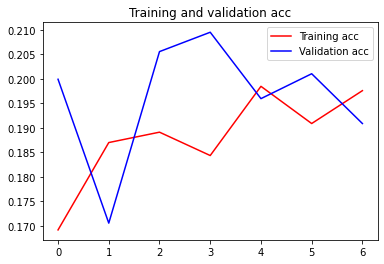

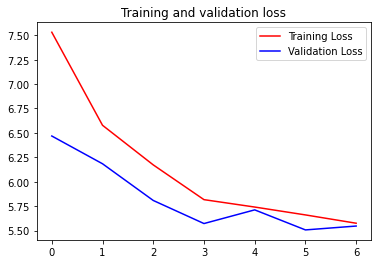

In [87]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [88]:
DNN_model = keras.models.load_model('/content/drive/MyDrive/20221_my_DNI_DNN_model.h5')

In [89]:
DNN_model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 5.4763 - acc: 0.2032


[5.476263523101807, 0.20324629545211792]

현재 개발한 모델을 사용하면 20%의 적중률로 고객이 어떤 상품을 구매할 지 대분류 이름을 예측가능합니다. 이로 인해 초기 가설설정 당시 기대효과를 어느정도 달성가능 할 것으로 보이며, 고객의 성별데이터 및 가족구성원 등 추가적인 데이터를 확보 한다면 적중률을 더 높일 수 있을 것으로 기대됩니다. 감사합니다.